In [1]:
import sklearn
%pylab inline
import pandas as pd
from collections import Counter
from IPython.core.display import display, HTML

Populating the interactive namespace from numpy and matplotlib


In [2]:
dns_types = {0: 'NONE', 1: 'A', 2: 'NS', 3: 'MD', 4: 'MF', 5: 'CNAME', 6: 'SOA', 7: 'MB', 8: 'MG', 9: 'MR', 10: 'NULL', 11: 'WKS', 12: 'PTR', 13: 'HINFO', 14: 'MINFO', 15: 'MX', 16: 'TXT', 17: 'RP', 18: 'AFSDB', 19: 'X25', 20: 'ISDN', 21: 'RT', 22: 'NSAP', 23: 'NSAP-PTR', 24: 'SIG', 25: 'KEY', 26: 'PX', 27: 'GPOS', 28: 'AAAA', 29: 'LOC', 30: 'NXT', 33: 'SRV', 35: 'NAPTR', 36: 'KX', 37: 'CERT', 38: 'A6', 39: 'DNAME', 41: 'OPT', 42: 'APL', 43: 'DS', 44: 'SSHFP', 45: 'IPSECKEY', 46: 'RRSIG', 47: 'NSEC', 48: 'DNSKEY', 49: 'DHCID', 50: 'NSEC3', 51: 'NSEC3PARAM', 52: 'TLSA', 55: 'HIP', 59: 'CDS', 60: 'CDNSKEY', 62: 'CSYNC', 99: 'SPF', 103: 'UNSPEC', 108: 'EUI48', 109: 'EUI64', 249: 'TKEY', 250: 'TSIG', 251: 'IXFR', 252: 'AXFR', 253: 'MAILB', 254: 'MAILA', 255: 'ANY', 256: 'URI', 257: 'CAA', 258: 'AVC', 32768: 'TA', 32769: 'DLV'}

In [3]:
df = pd.read_csv("pcaps/trace_dns_20170919_a.csv", sep="\t", dtype={'dns.qry.name.len': int}, error_bad_lines=False)
df['frame.time_epoch'] = pd.to_datetime(df['frame.time_epoch'], unit='s', origin='unix')
df = df.replace({'dns.qry.type': dns_types})
df.sample(10)

,dns.id,ip.src,ip.dst,frame.time_epoch,dns.qry.type,dns.qry.name.len,dns.qry.name,frame.len,dns.resp.ttl,dns.cname,dns.a,dns.aaaa,dns.txt
757684,0x0000d68e,187.124.15.148,187.124.15.221,2017-09-19 12:33:08.191755,PTR,27,23.189.211.115.in-addr.arpa,148,1800,NaN,NaN,NaN,NaN
855614,0x00008718,187.124.15.148,187.124.21.241,2017-09-19 12:46:33.639419,TXT,35,224.222.158.35.ip.03.s.sophosxl.net,112,10,NaN,NaN,NaN,NaN
642702,0x0000c0dc,187.124.15.148,187.124.7.179,2017-09-19 12:17:00.856642,A,22,http.00.s.sophosxl.net,149,"570,46,32","http.00.a.sophosxl.net,ns.sxl31.sophosxl.net",54.247.167.6,NaN,NaN
463824,0x0000a1dc,187.124.15.148,187.124.89.183,2017-09-19 11:52:37.291942,A,24,sc-analytics.appspot.com,143,"189,189",appspot-preview.l.google.com,216.58.201.52,NaN,NaN
454812,0x00000977,187.124.15.148,187.124.15.152,2017-09-19 11:51:26.412538,AAAA,10,073576.com,142,79,NaN,NaN,NaN,NaN
629541,0x000055e2,203.219.233.150,187.124.15.148,2017-09-19 12:14:59.894114,TXT,237,3.1o19sr00no4os04qp3753pnqr8q45o5q0n77q7s9so7s...,301,NaN,NaN,NaN,NaN,NaN
790703,0x0000e73a,187.124.15.148,187.124.251.252,2017-09-19 12:37:14.378653,TXT,34,247.38.239.54.ip.04.s.sophosxl.net,111,10,NaN,NaN,NaN,NaN
5754,0x00004a6d,187.124.15.148,187.124.15.221,2017-09-19 10:58:22.658627,A,14,a6-66.akam.net,94,73814,NaN,23.211.133.66,NaN,NaN
940582,0x0000d1dc,187.124.15.148,187.124.229.152,2017-09-19 12:59:34.606831,A,24,usc.adserver.snapads.com,104,88,NaN,130.211.46.74,NaN,NaN
842684,0x00001c14,187.124.15.148,187.124.15.181,2017-09-19 12:44:39.948906,PTR,25,190.4.48.138.in-addr.arpa,129,86400,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,dns.qry.name.len,frame.len
count,1.023224e+06,1.023224e+06
mean,5.803588e+01,1.759626e+02
std,7.192809e+01,8.964045e+01
min,2.000000e+00,7.000000e+01
25%,2.000000e+01,1.110000e+02
50%,2.700000e+01,1.420000e+02
75%,4.100000e+01,2.060000e+02
max,2.530000e+02,1.774000e+03


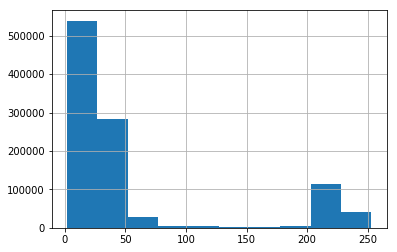

In [5]:
df['dns.qry.name.len'].hist()

In [6]:
df['dns.qry.name.len'].describe()

count    1.023224e+06
mean     5.803588e+01
std      7.192809e+01
min      2.000000e+00
25%      2.000000e+01
50%      2.700000e+01
75%      4.100000e+01
max      2.530000e+02
Name: dns.qry.name.len, dtype: float64

In [7]:
df[df['dns.qry.name.len'] > 150].sample(20)

,dns.id,ip.src,ip.dst,frame.time_epoch,dns.qry.type,dns.qry.name.len,dns.qry.name,frame.len,dns.resp.ttl,dns.cname,dns.a,dns.aaaa,dns.txt
571109,0x00002626,203.212.137.150,187.124.15.148,2017-09-19 12:06:47.234357,TXT,219,3.1o19sr00n57o62r3p37671pqr896r9r05o77q7s9so7s...,283,NaN,NaN,NaN,NaN,NaN
965166,0x00009566,95.174.171.209,187.124.15.148,2017-09-19 13:02:57.332719,TXT,197,3.1o19sr00ons3o7sqp374pspq8r30n2n4n977q7s9so7s...,328,"300,300,300",NaN,NaN,NaN,NaN
992532,0x0000c163,203.182.166.253,187.124.15.148,2017-09-19 13:06:43.301317,TXT,163,2.ZSDjHwODZR4jGQNWOtHeQtZPTtHNOOECP1iMg9dia7om...,267,10,NaN,NaN,NaN,w u h 0 0\t#9e6f3915c06c5c10
266370,0x00005a63,207.124.27.243,187.124.15.148,2017-09-19 11:27:17.001743,TXT,237,3.1o19sr00no4rnr9pp376s4nqr84718827677q7s9so7s...,301,NaN,NaN,NaN,NaN,NaN
234324,0x000051ec,187.124.15.148,187.124.55.178,2017-09-19 11:23:32.080030,TXT,237,3.1o19sr00nn3r1nq1p3335s05r8ssq1osq577q7s9so7s...,301,NaN,NaN,NaN,NaN,NaN
518657,0x0000db94,207.125.69.158,187.124.15.148,2017-09-19 12:00:00.939483,TXT,213,3.1o19sr00no46nnr7p330o91qr89n57o6491s17rqrp18...,277,NaN,NaN,NaN,NaN,NaN
81281,0x000078fe,187.124.15.148,187.124.53.191,2017-09-19 11:06:05.895244,TXT,231,3.1o19sr00n40699n4p31605pqr827rnp45777q7s9so7s...,311,300,NaN,NaN,NaN,x c
64009,0x00000902,187.124.15.148,187.124.247.254,2017-09-19 11:04:08.182076,TXT,237,3.1o19sr00no3186r9p3499925r885o45ssr77q7s9so7s...,301,NaN,NaN,NaN,NaN,NaN
24284,0x0000252b,187.124.15.148,187.124.9.212,2017-09-19 11:00:24.803346,TXT,221,3.1o19sr00n380708rp37489pqr800r0n31777q7s9so7s...,301,300,NaN,NaN,NaN,x c
438286,0x0000dcac,203.219.233.150,187.124.15.148,2017-09-19 11:49:14.888140,TXT,217,3.1o19sr00no4o52q4p309nopqr80496po4777q7s9so7s...,281,NaN,NaN,NaN,NaN,NaN


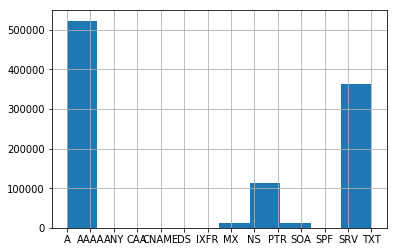

In [8]:
df['dns.qry.type'].hist()

In [9]:
df['dns.qry.type'].value_counts()

A        415131
TXT      346798
AAAA     107605
PTR      104651
SRV       17089
SOA       11479
MX        11313
NS         8354
IXFR        501
DS          291
ANY           8
CNAME         2
SPF           1
CAA           1
Name: dns.qry.type, dtype: int64

In [10]:
df[df['dns.qry.type'] == 'TXT'].sample(20)

,dns.id,ip.src,ip.dst,frame.time_epoch,dns.qry.type,dns.qry.name.len,dns.qry.name,frame.len,dns.resp.ttl,dns.cname,dns.a,dns.aaaa,dns.txt
31577,0x00008dc7,207.190.89.180,187.124.15.148,2017-09-19 11:01:05.336926000,TXT,229,3.1o18sr00n1553pq2p31659r2r8n0043ssn77q7s9so7s...,411,"300,300,300",NaN,NaN,NaN,x u
571319,0x00000767,203.212.137.150,187.124.15.148,2017-09-19 12:06:49.511250000,TXT,235,3.1o19sr00n5106p7qp37068sor88r5q1n3577q7s9so7s...,417,"300,300,300",NaN,NaN,NaN,x c
746630,0x00004d77,187.124.15.148,187.124.45.210,2017-09-19 12:32:05.265498999,TXT,217,3.1o19sr00no6o0s39p374281qr8o03noq7077q7s9so7s...,297,300,NaN,NaN,NaN,x c
528717,0x0000f917,187.124.15.148,187.124.247.149,2017-09-19 12:01:18.743645000,TXT,60,9ff1b2be0b2f5d9fbe89240c535a443954833808.p.04....,124,NaN,NaN,NaN,NaN,NaN
342374,0x000033ea,187.124.15.148,187.124.245.125,2017-09-19 11:36:18.144078000,TXT,211,3.1o19sr00no4r1sn8p39186s5r830n2n4n977q7s9so7s...,275,NaN,NaN,NaN,NaN,NaN
258858,0x00001249,187.124.15.148,187.124.43.186,2017-09-19 11:26:15.028594000,TXT,234,4.1o18sr00nnr89030p376o7pqr88838649q77q7s9so7s...,314,300,NaN,NaN,NaN,x u
486563,0x0000ade4,187.124.15.148,187.124.251.252,2017-09-19 11:56:02.589128000,TXT,36,hflap.arkntr.pbz.m.04.s.sophosxl.net,140,10,NaN,NaN,NaN,w u r 6 0\t#4c5f76abc08d7b57
42952,0x0000c7b6,207.124.27.243,187.124.15.148,2017-09-19 11:02:11.259548000,TXT,235,3.1o19sr00no565n3sp365p5pqr8rr736p6777q7s9so7s...,417,"300,300,300",NaN,NaN,NaN,x c
143396,0x000058c5,187.124.15.148,187.124.25.148,2017-09-19 11:12:44.207688000,TXT,225,3.1o19sr00noo316prp37506p5r8n3prs22n77q7s9so7s...,305,300,NaN,NaN,NaN,x c
277474,0x00002350,187.124.15.148,187.124.251.243,2017-09-19 11:28:43.114033000,TXT,215,3.1o18sr00n76rqns7p37594nqr8on339r5277q7s9so7s...,295,300,NaN,NaN,NaN,x u


In [11]:
df['dns.qry.name'][0]

'3.1o19sr00no9563s5p356966qr8prq1q8r177q7s9so7s45n9r623ooo9312q2p2.o5sp8r741p635393648s2q125s12qrn970o3ps5p26o573o2n30noo21sr2rroq.s5014n9r3rn99o2r4773n309q0oo002o92rs1nr49q15pq.47o68097q1pqs929r3597s0qq9n1o05qnp272105.i.06.s.sophosxl.net'

In [18]:
jsonstr = df.sample(10000).to_json(orient='records')

HTML_TEMPLATE = \
    """
        <link rel="import" href="/nbextensions/facets-dist/facets-jupyter.html">
        <facets-dive id="elem_id" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem_id").data = data;
        </script>
    """
html = HTML_TEMPLATE.format(jsonstr=jsonstr)
display(HTML(html))